In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

raw_df_1=pd.read_csv('/content/gdrive/MyDrive/CCP_Project/Neelesh _Dataset/raw_data_competitor_monitoring_1.csv')
print(f"Length of raw dataframe = {len(raw_df_1)}")
raw_df_1.head(2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Length of raw dataframe = 4771


,_id,_index,_score,_type,concepts,found_dates,id,internal_links,keywords,language,...,news_summary,news_title,news_topic,news_type,references,sentiment_label,sentiment_score,source_country,source_name,source_type
0,FinenfreiPresostenfrei12884764,2021_reghub_new,NaN,_doc,NaN,[],FinenfreiPresostenfrei12884764,[],NaN,de,...,The article discusses how a fortunate man with...,Tradingaktion mit comdirect Handeln Sie Socié...,"[{""description"":""Online Banken und Vermögensve...",Press releases,[],NaN,0.0,Germany,Finanzen.net,Information Provider
1,focScholzPresid217207826html,2021_reghub_new,NaN,_doc,NaN,[],focScholzPresid217207826html,[],NaN,en,...,The article discusses how M.M. Warburg may hav...,CumExAffäre: Brisante Tagebucheinträge belaste...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,[],NaN,0.0,Global,focus.de,Information Provider


In [3]:
raw_df_2=pd.read_excel('/content/gdrive/MyDrive/CCP_Project/Neelesh _Dataset/raw_data_competitor_monitoring_2.xlsx')
print(f"Length of raw dataframe = {len(raw_df_2)}")
raw_df_2.head(2)

Length of raw dataframe = 14608


,_id,_index,_score,_type,concepts,found_dates,id,internal_links,keywords,language,...,news_summary,news_title,news_topic,news_type,references,sentiment_label,sentiment_score,source_country,source_name,source_type
0,fin1023Preslofreshbuy917302,2021_reghub_new,NaN,_doc,NaN,[],fin1023Preslofreshbuy917302,[],NaN,en,...,Berenberg Bank analysts have provided a buy ra...,HelloFresh Buy von Joh. Berenberg Gossler & Co...,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.at,Information Provider
1,finichtenStoceaaufbuy322htm,2021_reghub_new,NaN,_doc,NaN,[],finichtenStoceaaufbuy322htm,[],NaN,en,...,"The article states that Berenberg, a German in...",BERENBERG stuft Nordea auf 'Buy' Finanznachri...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,[],NaN,0.0,Global,finanznachrichten.de,Information Provider


In [4]:
#merge raw data
frames = [raw_df_1, raw_df_2]
raw_df_concat = pd.concat(frames)
raw_df = raw_df_concat.drop_duplicates(subset='_id', keep='first') # remove duplicate rows
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 0 to 14607
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                14699 non-null  object 
 1   _index             14694 non-null  object 
 2   _score             26 non-null     object 
 3   _type              14672 non-null  object 
 4   concepts           2251 non-null   object 
 5   found_dates        13943 non-null  object 
 6   id                 14675 non-null  object 
 7   internal_links     13894 non-null  object 
 8   keywords           2357 non-null   object 
 9   language           14658 non-null  object 
 10  news_author        1988 non-null   object 
 11  news_content       14667 non-null  object 
 12  news_date          14659 non-null  object 
 13  news_label         248 non-null    object 
 14  news_last_updated  8 non-null      object 
 15  news_legalinforce  14659 non-null  object 
 16  news_link          146

In [5]:
news_df = raw_df[['id', 'found_dates', 'news_date', 'news_title',
       'internal_links', 'keywords', 'language', 'news_author', 'news_content',
       'news_label', 'news_legalinforce',
       'news_link', 'news_rank', 'news_summary', 'news_topic',
       'news_type', 'sentiment_label', 'sentiment_score',
       'source_country', 'source_name', 'source_type']]

news_df.head(3)

,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_link,news_rank,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type
0,FinenfreiPresostenfrei12884764,[],2023-10-03T18:00:43.000Z,Tradingaktion mit comdirect Handeln Sie Socié...,[],NaN,de,NaN,The article discusses how a fortunate man with...,NaN,...,https://www.finanzen.net/nachricht/rohstoffe/t...,0.0,The article discusses how a fortunate man with...,"[{""description"":""Online Banken und Vermögensve...",Press releases,NaN,0.0,Germany,Finanzen.net,Information Provider
1,focScholzPresid217207826html,[],2023-10-03T16:59:33.000Z,CumExAffäre: Brisante Tagebucheinträge belaste...,[],NaN,en,NaN,The article discusses how M.M. Warburg may hav...,NaN,...,https://www.focus.de/politik/staatsanwaltschaf...,0.0,The article discusses how M.M. Warburg may hav...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,NaN,0.0,Global,focus.de,Information Provider
2,merngnisPresente92556026html,[],2023-10-03T16:06:01.000Z,CumExAffäre: Dokumente bringen Scholz offenbar...,[],NaN,en,NaN,The Cologne Prosecutor's Office accuses German...,NaN,...,https://www.merkur.de/politik/scholz-cum-ex-af...,0.0,The Cologne Prosecutor's Office accuses German...,"[{""description"":""M.M. Warburg"",""relevance"":6,""...",Press releases,NaN,0.0,Global,merkur.de,Information Provider


In [6]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 0 to 14607
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14675 non-null  object 
 1   found_dates        13943 non-null  object 
 2   news_date          14659 non-null  object 
 3   news_title         14650 non-null  object 
 4   internal_links     13894 non-null  object 
 5   keywords           2357 non-null   object 
 6   language           14658 non-null  object 
 7   news_author        1988 non-null   object 
 8   news_content       14667 non-null  object 
 9   news_label         248 non-null    object 
 10  news_legalinforce  14659 non-null  object 
 11  news_link          14667 non-null  object 
 12  news_rank          14659 non-null  float64
 13  news_summary       14660 non-null  object 
 14  news_topic         14654 non-null  object 
 15  news_type          14654 non-null  object 
 16  sentiment_label    207

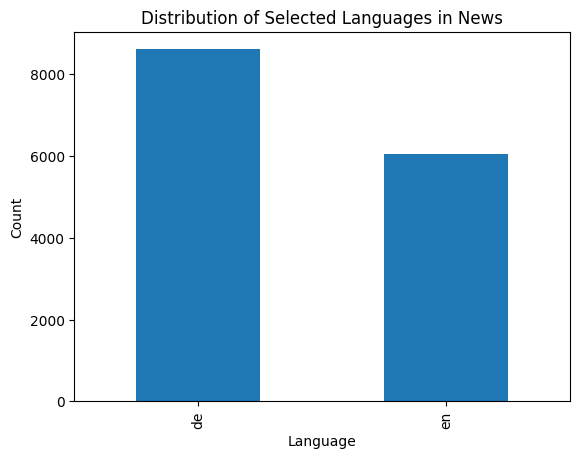

In [7]:
frequent_languages = ['en', 'de']
filtered_df = news_df[news_df['language'].isin(frequent_languages)]
filtered_df['language'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Selected Languages in News')
plt.show()

#Detecting Actual English News

<Axes: >

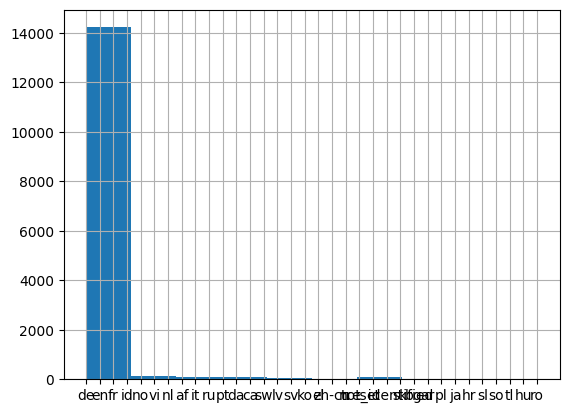

In [8]:
# There are still rows of news that are wrongly labelled as English, even if they are not in English.
# We check this through 'langdetect' python library
!pip install langdetect
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0
for index, row in news_df.iterrows():
  title_str = str(row['news_title']) if not pd.isnull(row['news_title']) else '' # Convert 'news_title' to string and handle potential NaN values

  if len(title_str) > 3: # ensure that text has sufficient length for language detection
    news_df.at[index, 'language'] = detect(title_str) # Use langdetect on the string
  else:
    news_df.at[index, 'language'] = 'not_identified'

news_df.language.hist()


In [9]:
# hereonwards, only working on news with english language
news_df_en = news_df[news_df.language == 'en']
news_df_en = news_df_en.reset_index(drop=True)
print(len(news_df_en))
news_df_en.head(5)

3868


,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_link,news_rank,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type
0,busTIMESPresesginvestingubs,[],2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,[],NaN,en,NaN,The UBS APAC Sustainable Finance Conference 20...,NaN,...,https://www.businesstimes.com.sg/wealth/sustai...,0.0,The UBS APAC Sustainable Finance Conference 20...,"[{""description"":""Sustainability"",""relevance"":6...",Press releases,NaN,0.0,Global,businesstimes.com.sg,Information Provider
1,pritionalPresrmanoftheboard,[],2023-10-03T10:42:46.000Z,Sienna IM appoints chairman of the board Priv...,[],NaN,en,NaN,The article mentioned related company profiles...,NaN,...,https://www.privatebankerinternational.com/new...,0.0,The article mentioned related company profiles...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,privatebankerinternational.com,Information Provider
2,defTSEMPresngnasdaqtsemhtml,[],2023-10-03T09:01:16.000Z,Tower Semiconductor Target of Unusually High O...,[],NaN,en,NaN,Deutsche Bank AG has acquired an additional 48...,NaN,...,https://www.defenseworld.net/2023/10/03/tower-...,0.0,Deutsche Bank AG has acquired an additional 48...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,defenseworld.net,Information Provider
3,boeEWSdeStoc630euro4228954,[],2023-10-03T08:24:01.000Z,ANALYSEFLASH: Berenberg senkt Rational auf 'Ho...,[],NaN,en,NaN,Die Investmentbank Berenberg hat das Kursziel ...,NaN,...,https://www.boersennews.de/nachrichten/artikel...,0.0,Die Investmentbank Berenberg hat das Kursziel ...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,NaN,0.0,Global,boersennews.de,Information Provider
4,theHeraldPrescivilfraudtrial,[],2023-10-03T06:27:32.000Z,Trump Arrives at Manhattan Court for Start of ...,[],NaN,en,NaN,"The article discusses how Donald Trump, the fo...",NaN,...,https://theglobalherald.com/news/trump-arrives...,0.0,"The article discusses how Donald Trump, the fo...","[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,theglobalherald.com,Information Provider


#Adding a column in the dataset to count number words in News_conten before removing Stopwords

In [10]:
# Convert 'news_content' column to string type
news_df_en.loc[:, 'news_content'] = news_df_en['news_content'].astype(str)

# Add a new column 'content_length' with the length of 'news_content'
news_df_en.loc[:, 'content_length'] = news_df_en['news_content'].apply(len)

# Display the DataFrame with the new column
print(news_df_en)

                                  id found_dates                 news_date  \
0        busTIMESPresesginvestingubs          []  2023-10-03T15:35:31.000Z   
1        pritionalPresrmanoftheboard          []  2023-10-03T10:42:46.000Z   
2        defTSEMPresngnasdaqtsemhtml          []  2023-10-03T09:01:16.000Z   
3         boeEWSdeStoc630euro4228954          []  2023-10-03T08:24:01.000Z   
4       theHeraldPrescivilfraudtrial          []  2023-10-03T06:27:32.000Z   
...                              ...         ...                       ...   
3863    UBSupdatePres21htmlcaasIDRSS          []       2022-01-18 03:00:00   
3864        Tec2UBSPresewarin2022ubs          []       2022-01-13 08:00:09   
3865     EurchosPres9fa0e44b60enhtml          []       2022-01-10 19:00:00   
3866  CoirawalsPrestomerswithdrawals          []       2022-01-07 18:00:00   
3867    CryeportsPresbypolicereports          []       2022-01-07 17:51:08   

                                             news_title interna

#Removing Stop words and count the number of words after Stopwords removal

In [11]:
#  topic modeling using embeddings based on https://github.com/ddangelov/Top2Vec
# # (original paper - https://arxiv.org/abs/2008.09470)

%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]


In [12]:
%%capture
from top2vec import Top2Vec

!python -m spacy download en_core_web_lg
import spacy

en = spacy.load("en_core_web_lg") #loading the english language large model of spacy

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Set NLTK data path
nltk.data.path.append("/path/to/nltk_data")  # Replace "/path/to/nltk_data" with the actual path

# Download NLTK stopwords and tokenizer
nltk.download('stopwords', download_dir="/path/to/nltk_data")  # Specify the download directory for stopwords
nltk.download('punkt', download_dir="/path/to/nltk_data")  # Specify the download directory for tokenizer


def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'news_content' column
news_df_en['news_content_stopwords'] = news_df_en['news_content'].apply(remove_stopwords)

# Display the updated DataFrame
print(news_df_en)

                                  id found_dates                 news_date  \
0        busTIMESPresesginvestingubs          []  2023-10-03T15:35:31.000Z   
1        pritionalPresrmanoftheboard          []  2023-10-03T10:42:46.000Z   
2        defTSEMPresngnasdaqtsemhtml          []  2023-10-03T09:01:16.000Z   
3         boeEWSdeStoc630euro4228954          []  2023-10-03T08:24:01.000Z   
4       theHeraldPrescivilfraudtrial          []  2023-10-03T06:27:32.000Z   
...                              ...         ...                       ...   
3863    UBSupdatePres21htmlcaasIDRSS          []       2022-01-18 03:00:00   
3864        Tec2UBSPresewarin2022ubs          []       2022-01-13 08:00:09   
3865     EurchosPres9fa0e44b60enhtml          []       2022-01-10 19:00:00   
3866  CoirawalsPrestomerswithdrawals          []       2022-01-07 18:00:00   
3867    CryeportsPresbypolicereports          []       2022-01-07 17:51:08   

                                             news_title interna

In [14]:
# Function to count words in the 'news_content_stopwords' column
def count_words(text):
    words = word_tokenize(text)
    return len(words)

# Apply the count_words function to create a new column 'word_count_stopwords'
news_df_en['word_count_stopwords'] = news_df_en['news_content_stopwords'].apply(count_words)

# Display the updated DataFrame
print(news_df_en)

                                  id found_dates                 news_date  \
0        busTIMESPresesginvestingubs          []  2023-10-03T15:35:31.000Z   
1        pritionalPresrmanoftheboard          []  2023-10-03T10:42:46.000Z   
2        defTSEMPresngnasdaqtsemhtml          []  2023-10-03T09:01:16.000Z   
3         boeEWSdeStoc630euro4228954          []  2023-10-03T08:24:01.000Z   
4       theHeraldPrescivilfraudtrial          []  2023-10-03T06:27:32.000Z   
...                              ...         ...                       ...   
3863    UBSupdatePres21htmlcaasIDRSS          []       2022-01-18 03:00:00   
3864        Tec2UBSPresewarin2022ubs          []       2022-01-13 08:00:09   
3865     EurchosPres9fa0e44b60enhtml          []       2022-01-10 19:00:00   
3866  CoirawalsPrestomerswithdrawals          []       2022-01-07 18:00:00   
3867    CryeportsPresbypolicereports          []       2022-01-07 17:51:08   

                                             news_title interna

In [15]:
#to download the dataset
news_df_en.to_excel("news_df_en_stopword.xlsx")

#Company Name Extraction

In [16]:
# sample news content and news summary

index = 2300

print(f"web_url: {news_df_en.news_link[index]}")
print(f"topic: {news_df_en.news_topic[index]}")
print(f"content: {news_df_en.news_content[index]}")
print(f"summary: {news_df_en.news_summary[index]}")


web_url: https://www.business-standard.com/article/markets/global-mkts-fully-pricing-in-fed-hike-to-5-5-indian-equities-at-risk-ubs-123030600373_1.html
topic: [{"description":"Marketing","relevance":12,"comment":"; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; ; marke; ; "},{"description":"Risiko Management","relevance":15,"comment":"; ; ; ; ; ; ; ; ; ; ; ; standard; "}]
content: India according to them is among the more sensitive markets to US rates and demonstrates the most sensitivity to local rates given higher influence of domestic flows into the market
summary: India according to them is among the more sensitive markets to US rates and demonstrates the most sensitivity to local rates given higher influence of domestic flows into the market


In [17]:
len(news_df_en[news_df_en.news_content == news_df_en.news_summary])
# almost all news summaries are same as news contents

3640

In [18]:
%%capture
#%pip install "accelerate>=0.16.0,<1" "transformers[torch]>=4.28.1,<5" "torch>=1.13.1,<2" "bitsandbytes>=0.40.2"
!pip install accelerate
!pip install transformers
!pip install torch
!pip install bitsandbytes

In [19]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-creden

In [20]:
!pip install accelerate


In [21]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    pipeline,
)

model_name="meta-llama/Llama-2-7b-chat-hf" # Model from hugging face
device_map = {"": 0} # Load the entire model on the GPU 0
use_4bit = True # Activate 4-bit precision base model loading
bnb_4bit_compute_dtype = "float16" # Compute dtype for 4-bit base models
bnb_4bit_quant_type = "nf4" # Quantization type (fp4 or nf4)
use_nested_quant = False # Activate nested quantization for 4-bit base models (double quantization)
compute_dtype = getattr(torch, bnb_4bit_compute_dtype) # Load tokenizer and model with QLoRA configuration

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
    )

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [22]:
generate_text = pipeline(task="text-generation", model=model, tokenizer=tokenizer, device_map="auto", torch_dtype=torch.bfloat16)

In [23]:
# res = generate_text("Explain to me the difference between nuclear fission and fusion.")
# print(res[0]["generated_text"])


In [24]:
# res = generate_text("'The article discusses the view of financial services company Oddo BHF on luxury goods company Kering ahead of its semi-annual results. Oddo BHF has maintained its neutral rating on Kering and has set a target price of \u20ac616. The analysis takes into account the potential impact of the COVID-19 pandemic on the luxury industry and highlights the uncertainties that lie ahead. While Kering's performance in the first quarter was strong, with revenue growth of 21.4%, concerns remain about the sustainability of this growth and the potential slowdown in the Chinese market. Oddo BHF emphasizes the importance of Kering's e-commerce strategy and the need for maintaining a balance between digital channels and physical retail locations. Overall, the article highlights the cautious stance of Oddo BHF regarding Kering's prospects in light of the evolving market conditions.' - What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas.")
# print(res[0]["generated_text"])

In [25]:
news_df_en['llm_output_company'] = ""
news_df_en['companies_in_news'] = ""

max_prompt_length = 200
shortened_news_df = news_df_en[news_df_en['news_content'].apply(lambda x: len(x.split()) <= max_prompt_length)]
len(shortened_news_df)

3451

#Update Prompt

In [26]:
# Filter out the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="transformers.pipelines.base")

for index, row in shortened_news_df.iterrows():
    prompt = "'" + row['news_content'] + "'" + " - Extract company names mentioned in the news content. If a company is referenced again with minor changes, maintain continuity from the previous mention. Only provide the relevant company names in your response, without additional text. If the news content doesn't mention any company names, reply with 'NOT APPLICABLE.Just answer with the names of them (in order of importance) separated by commas. If there is only one company, do not use comma in your response."
    shortened_news_df.at[index, 'llm_output_company'] = generate_text(prompt)[0]["generated_text"]

In [27]:
# # Maybe a better code for last cell! ---> This fixes the warnings received in the previous cell.

# for index, row in shortened_news_df.iterrows():
#     prompt = "'" + row['news_content'] + "'" + " - What companies are being discussed in the text, just answer with the names of them (in order of importance) separated by commas. If there is only one company, do not use a comma in your response."
#     input_ids = tokenizer.encode(prompt, return_tensors='pt')
#     max_length = len(input_ids[0]) + 256  #we can adjust this length of 256 according to our needs
#     shortened_news_df.at[index, 'llm_output_company'] = generate_text(prompt, max_length=max_length)[0]["generated_text"]

#Update Prompt

In [28]:
#extract company names from model output
for index, row in shortened_news_df.iterrows():
  split_text = row['llm_output_company'].split("Extract company names mentioned in the news content. If a company is referenced again with minor changes, maintain continuity from the previous mention. Only provide the relevant company names in your response, without additional text. If the news content doesn't mention any company names, reply with 'NOT APPLICABLE.Just answer with the names of them (in order of importance) separated by commas. If there is only one company, do not use comma in your response.")
  if len(split_text) > 1:
    shortened_news_df.at[index, 'companies_in_news'] = split_text[1].strip()
  else:
    shortened_news_df.at[index, 'companies_in_news'] =  ""

In [30]:
# Save the DataFrame to a CSV file
shortened_news_df.to_excel('news_df_with_company_names.xlsx', index=False)

# Download the CSV file to your local machine
from google.colab import files
files.download('news_df_with_company_names.xlsx')

shortened_news_df[['news_content','companies_in_news']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,news_content,companies_in_news
0,The UBS APAC Sustainable Finance Conference 20...,"UBS, APAC."
1,The article mentioned related company profiles...,
2,Deutsche Bank AG has acquired an additional 48...,Deutsche Bank AG\nSemiconductor company
3,Die Investmentbank Berenberg hat das Kursziel ...,* Berenberg\n* Rational\n* Baader Bank
4,"The article discusses how Donald Trump, the fo...","Deutsche Bank,"
...,...,...
3859,Ninety One adds to 4Factor team Submitted 2401...,"Example: 'Ninety One, 4Factor'."
3860,Analysts for multinational investment bank and...,"UBS Group AG, Insider."
3861,UBS Switzerland’s largest bank has warned abou...,UBS Switzerland’s largest bank has warned abou...
3862,Morrison & Co appoints Board Director Submitte...,Example: Morrison & Co Kate Mingay NOT APPLICA...
